# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,"html.parser")
soup.title

<title>Mars Temperature Data</title>

In [15]:
# Extract all rows of data
table = soup.find('table', class_='table')  # Assumes there's a class 'table'; update if needed

# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]


rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = [col.text.strip() for col in row.find_all('td')]
        rows.append(cols)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [17]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = [col.text.strip() for col in row.find_all('td')]
        if len(cols) == len(headers):  # Ensure the row matches header length
            rows.append(cols)

In [18]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=headers)

In [31]:
# Confirm DataFrame was created successfully
if not df.empty:
        print("DataFrame created successfully with the following columns:")
        print(df.head())
else:
        print("DataFrame is empty. Check the data extraction logic.")



DataFrame created successfully with the following columns:
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [32]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [41]:
# Change data types for data analysis
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['month'] = df['month'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [42]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [44]:
# 1. How many months are there on Mars?
df['month'].max() 

12

In [45]:
# 2. How many sols (Martian days) worth of data are there?
df['sol'].count()

1867

In [47]:
# 3. What is the average minimum temperature by month?
group = df.groupby('month')
min_temp = group['min_temp'].mean()
min_temp 

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

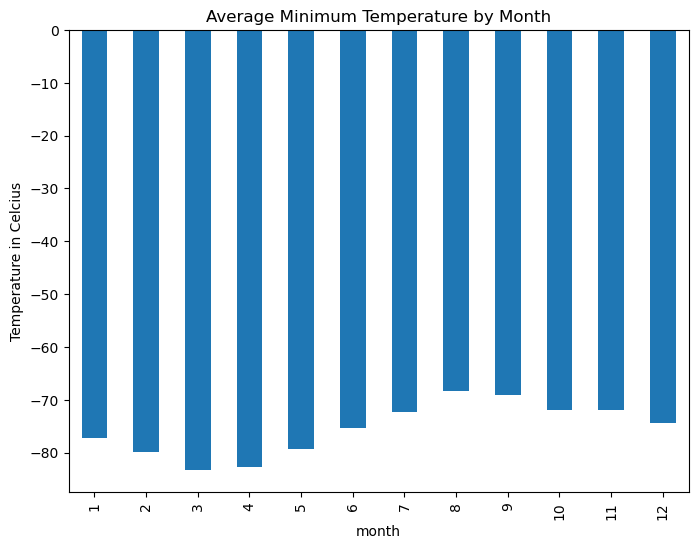

In [51]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6)) 
min_temp.plot(kind='bar')
plt.ylabel('Temperature in Celcius')
plt.title('Average Minimum Temperature by Month')

plt.show()

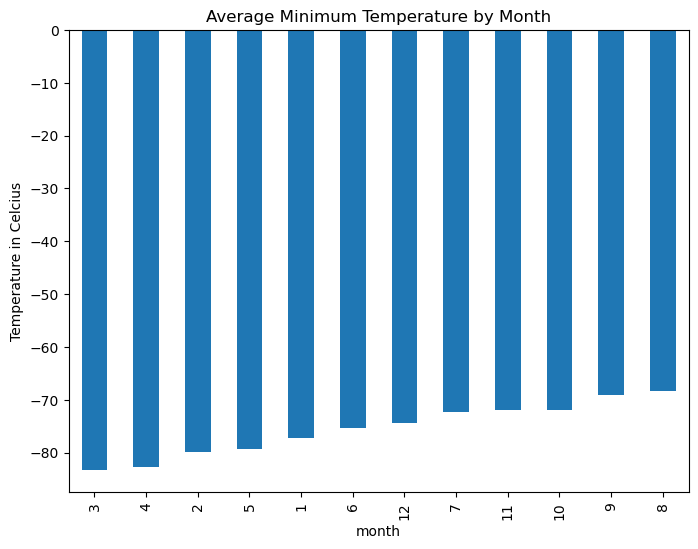

In [52]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp = min_temp.sort_values()
plt.figure(figsize=(8,6)) 
sorted_temp.plot(kind='bar')
plt.ylabel('Temperature in Celcius')
plt.title('Average Minimum Temperature by Month')

plt.show()

In [53]:
# 4. What is the average pressure by month?
group = df.groupby('month')
pressure = group['pressure'].mean()
pressure  

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

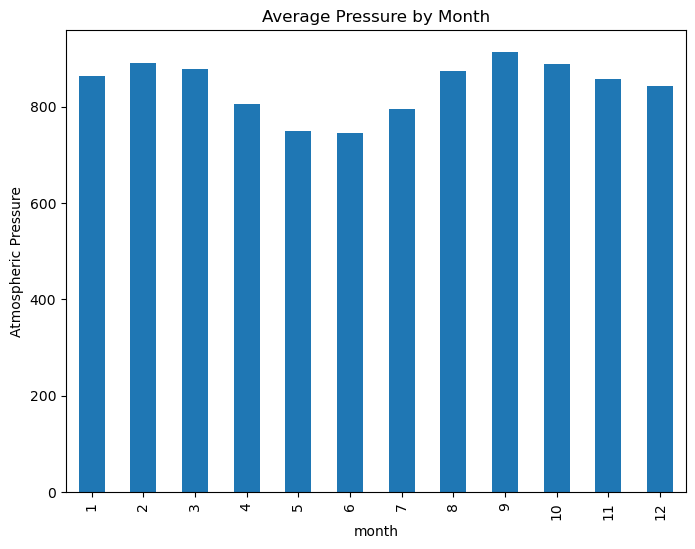

In [54]:
# Plot the average pressure by month
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6)) 
pressure.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

plt.show()

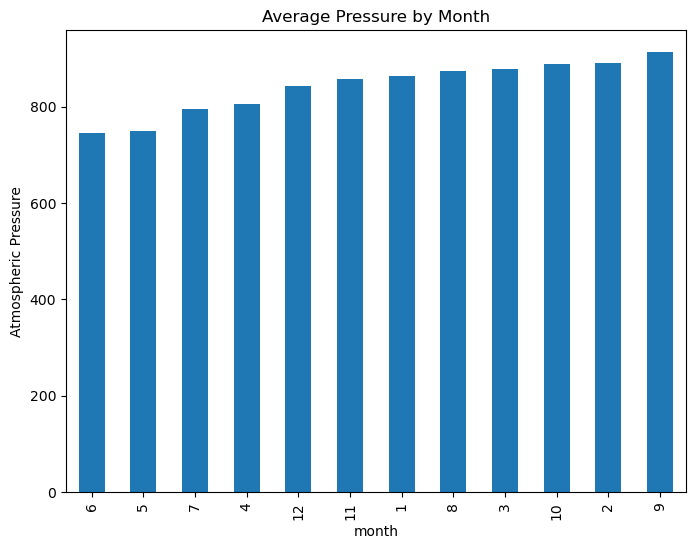

In [55]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pres = pressure.sort_values()
plt.figure(figsize=(8,6)) 
sorted_pres.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

plt.show()

Text(0.5, 0, 'Sols')

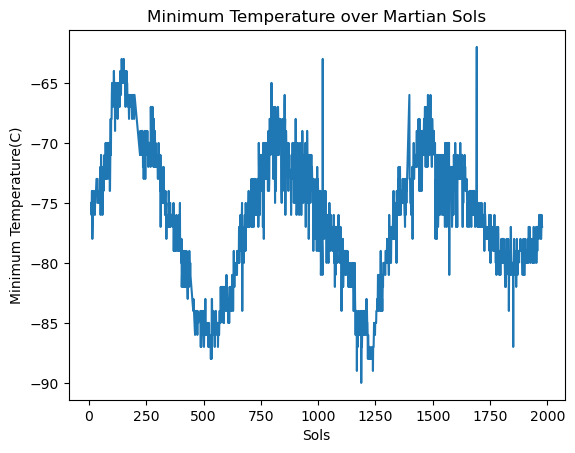

In [57]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# There appear to be 1867 days in a Martian year 

plt.plot(df['sol'], df['min_temp'])
plt.title('Minimum Temperature over Martian Sols')
plt.ylabel('Minimum Temperature(C)')
plt.xlabel('Sols')

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature

# Month 3 was the coldest month while month 8 was the warmest 

#### Atmospheric Pressure

# Month 6 appeared to have the lowest atmospheric pressure while month 9 had the highest

#### Year Length

# There appear to be 1867 days in a Martian year 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [59]:
# Write the data to a CSV
df.to_csv('data.csv')


In [22]:
browser.quit()